In [8]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
# Load the JSON file
with open("../data/playback_data/PlaybackExperienceScoreChanged.json", "r") as f:
    data = json.load(f)

In [3]:
# Convert JSON to DataFrame
df = pd.DataFrame(data)

In [4]:
# Convert timestamp to datetime
df["context_time"] = pd.to_datetime(df["context_time"], utc=True)

In [5]:
# Sort by time
df = df.sort_values("context_time")

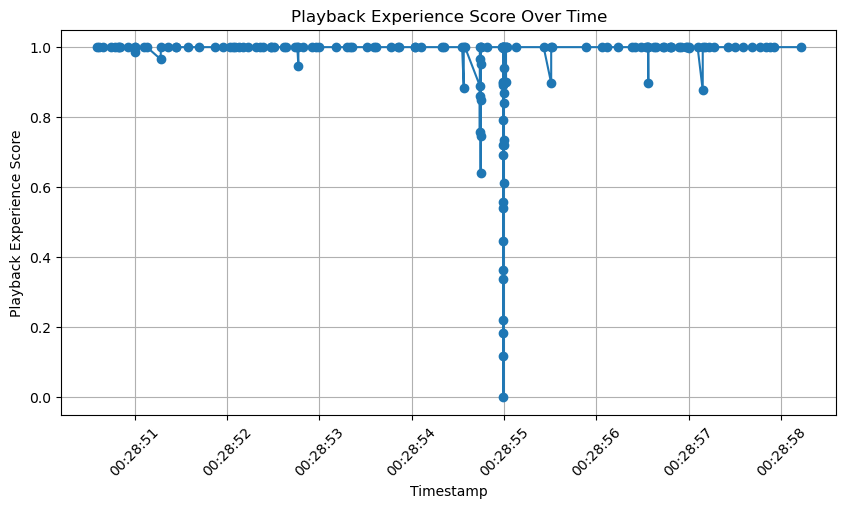

In [9]:
# Plot playback experience score over time
plt.figure(figsize=(10, 5))
plt.plot(df["context_time"], df["message_score"], marker="o", linestyle="-")
plt.xlabel("Timestamp")
plt.ylabel("Playback Experience Score")
plt.title("Playback Experience Score Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

- The playback experience score remained **stable at 1.0** for most of the session.
- Several **sudden drops** in the score occurred, with the most significant drop nearing **0.0** at one point.

- The dips in score could indicate **buffering, track skipping, network instability, or playback interruptions**.
- The sharpest drop suggests **a major playback failure or connection loss**.
- Smaller fluctuations might be caused by **temporary quality reductions or brief connectivity issues**.

---

# **Playback Experience Over Time**

In [11]:
import seaborn as sns
import matplotlib as plt

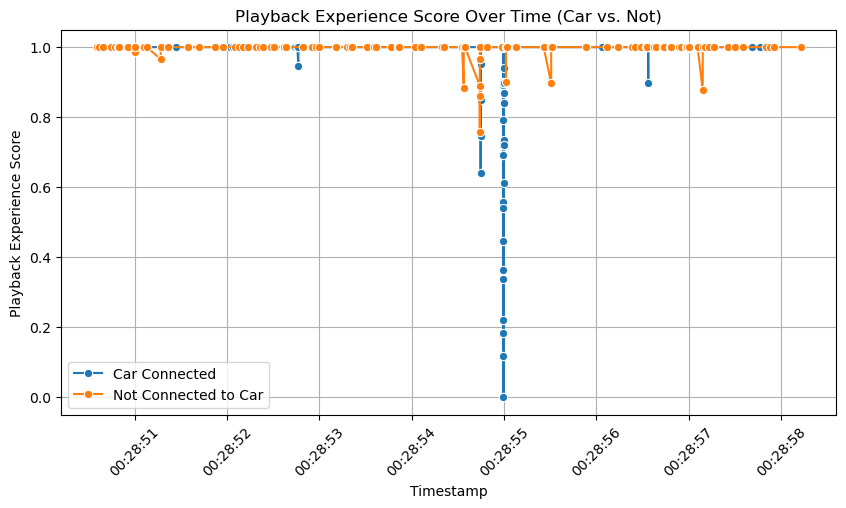

In [12]:
plt.figure(figsize=(10, 5))

# Plot playback experience over time
sns.lineplot(data=df[df["message_is_car_connected"] == True], x="context_time", y="message_score", label="Car Connected", marker="o")
sns.lineplot(data=df[df["message_is_car_connected"] == False], x="context_time", y="message_score", label="Not Connected to Car", marker="o")

plt.xlabel("Timestamp")
plt.ylabel("Playback Experience Score")
plt.title("Playback Experience Score Over Time (Car vs. Not)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

- This chart shows how playback experience scores change over time for **car-connected** (blue) vs. **not connected to car** (orange).
- A score of **1.0 means smooth playback**, while lower values indicate **interruptions or failures**.

### Key Observations
- **Car-connected playback** has **frequent dips**, including some dropping to **0.0**.
- **Non-car playback** stays mostly stable near **1.0** with fewer issues.

### Possible Causes
- **Bluetooth connection issues** in the car.  
- **Network problems** when switching between WiFi and cellular.  
- **Spotify app issues** affecting car playback.  

---

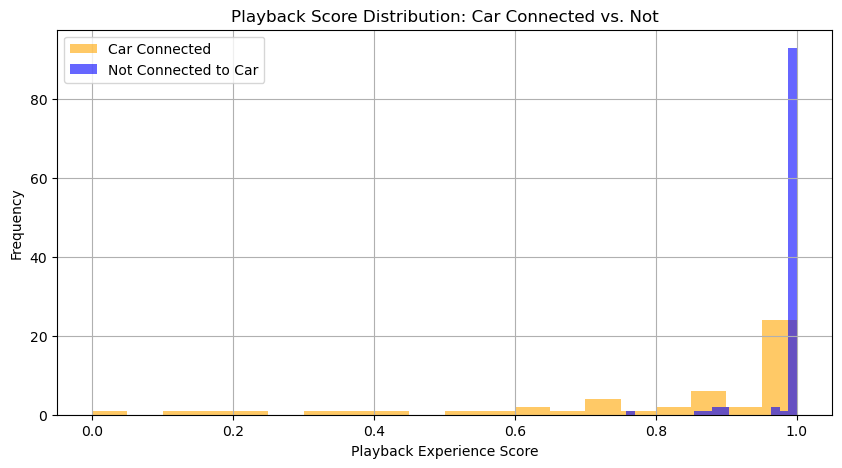

In [13]:
# Plot histograms for playback scores
plt.figure(figsize=(10, 5))
plt.hist(df[df["message_is_car_connected"] == True]["message_score"], bins=20, alpha=0.6, label="Car Connected", color="orange")
plt.hist(df[df["message_is_car_connected"] == False]["message_score"], bins=20, alpha=0.6, label="Not Connected to Car", color="blue")

plt.xlabel("Playback Experience Score")
plt.ylabel("Frequency")
plt.title("Playback Score Distribution: Car Connected vs. Not")
plt.legend()
plt.grid()
plt.show()

In [14]:
# Count fatal errors in-car vs. not in-car
fatal_car_errors = df[(df["message_is_car_connected"] == True) & (df["message_score"] < 0.5)].shape[0]
fatal_non_car_errors = df[(df["message_is_car_connected"] == False) & (df["message_score"] < 0.5)].shape[0]

print(f"Fatal Errors While in Car: {fatal_car_errors}")
print(f"Fatal Errors When Not in Car: {fatal_non_car_errors}")

Fatal Errors While in Car: 7
Fatal Errors When Not in Car: 0


- This histogram compares **playback scores** for car-connected (orange) vs. not connected to car (blue).
- Higher bars near **1.0** mean smoother playback, while lower values indicate interruptions.

### Key Observations
- **Car-connected playback** has **more low-score occurrences**, meaning more disruptions.
- **Non-car playback** stays near **1.0**, showing fewer issues.
- **Fatal errors only occurred in the car (7 errors), while non-car playback had none.**

### Possible Causes
- **Bluetooth issues** causing playback drops.  
- **Network problems** affecting in-car streaming.  
- **Car infotainment system interruptions.**  